In [2]:
#Importing Library

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Loading Data

In [3]:
# Uploading dataset
data=pd.read_csv("Dataset_Poems.csv").dropna(subset=['Poem', 'Type'])


In [4]:
print("The dimension of dataset:", data.shape)

The dimension of dataset: (435, 5)


In [5]:
data.columns

Index(['S. No.', 'Poem', 'Type', 'Poet', 'Reference'], dtype='object')

In [6]:
data['Poem']

0      तब लग तारा जगमगे, जब लग उगे न सूर |\nतब लग जीव...
1      आस पराई राख्त, खाया घर का खेत । \nऔरन को प्त ब...
2      सोना, सज्जन, साधु जन, टूट जुड़ै सौ बार | \n\nद...
3      सब धरती कारज करूँ, लेखनी सब बनराय | \n\nसात सम...
4      बलिहारी वा दूध की, जामे निकसे घीव । \n\nघी साख...
                             ...                        
430    मुआफ़िक़ जो फ़िज़ा तैयार की है\nबड़ी तदबीर से ...
431    चराग़ों का घराना चल रहा है\nहवा से दोस्ताना चल ...
432    तूफ़ां तो इस शहर में अक्सर आता है\nदेखें अबकि क...
433    ज़मीं बालिश्त भर होगी हमारी\nयहाँ कैसे बसर होगी...
434    ये आईना फ़साना हो चुका है\nतुझे देखे ज़माना हो च...
Name: Poem, Length: 435, dtype: object

In [7]:
data.head()

,S. No.,Poem,Type,Poet,Reference
0,1,"तब लग तारा जगमगे, जब लग उगे न सूर |\nतब लग जीव...",Doha,Kabir,https://archive.org/details/hindi-book-kabir-d...
1,2,"आस पराई राख्त, खाया घर का खेत । \nऔरन को प्त ब...",Doha,Kabir,https://archive.org/details/hindi-book-kabir-d...
2,3,"सोना, सज्जन, साधु जन, टूट जुड़ै सौ बार | \n\nद...",Doha,Kabir,https://archive.org/details/hindi-book-kabir-d...
3,4,"सब धरती कारज करूँ, लेखनी सब बनराय | \n\nसात सम...",Doha,Kabir,https://archive.org/details/hindi-book-kabir-d...
4,5,"बलिहारी वा दूध की, जामे निकसे घीव । \n\nघी साख...",Doha,Kabir,https://archive.org/details/hindi-book-kabir-d...


In [8]:
data["Type"].value_counts()

Type
Kavita          187
Nazm_Ghazal     105
Sher/Shayari     73
Doha             70
Name: count, dtype: int64

In [9]:
for i in range(len(data[data["Type"]=="Doha"])):
    print(i,data[data["Type"]=="Doha"]["Poem"][i])

0 तब लग तारा जगमगे, जब लग उगे न सूर |
तब लग जीव जग कर्मवश, ज्यों त्रग ज्ञान न पूर 
1 आस पराई राख्त, खाया घर का खेत । 
औरन को प्त बोधता, मुख में पड़ रेत ॥
2 सोना, सज्जन, साधु जन, टूट जुड़ै सौ बार | 

दुर्जन कुम्भ कुम्हार के, ऐके धका दरार ॥
3 सब धरती कारज करूँ, लेखनी सब बनराय | 

सात समुद्र की मसि करूँ गुरुगुन लिखा न जाय ॥
4 बलिहारी वा दूध की, जामे निकसे घीव । 

घी साखी कबीर की, चार वेद का जीव ॥
5 आग जो लागी समुद्र में, धुआँ न प्रकट होय | 

सो जाने जो जरमुआ, जाकी लाई होय ॥
6 साधु गाँठि न बाँधई, उदर समाता लेय | 

आगे-पीछे हरि खड़े जब भोगे तब देय ॥
7 घट का परदा खोलकर, सन्मुख दे दीदार । 

बाल सने ही सांइया, आवा अन्त का यार ॥
8 कबिरा खालिक जागिया, और ना जागे कोय | 

जाके विषय विष भरा, दास बन्दगी होय ॥
9 ऊँचे कुल में जामिया, करनी ऊँच न होय | 

सौरन कलश सुरा, भरी, साधु निन्‍्दा सोय ॥
10 सुमरण की सुब्यों करो ज्यों गागर पनिहार | 
होले-होले सुरत में, कहैं कबीर विचार ॥
11 सब आए इस एक में, डाल्र-पात फल-फूल | 

कबिरा पीछा क्या रहा, गह पकड़ी जब मूल ॥
12 जो जन भीगे रामरस, विगत कबहूँ ना रूख | 
अनुभव भा

## Preprocessing 

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Type_Encoded'] = label_encoder.fit_transform(data['Type'])


In [11]:
def remove_empty_lines(text):
    return '\n'.join([line for line in text.split('\n') if line.strip()])

In [12]:
print("Before Removing empty lines \n")
for i in range(5):
    print(i,data[data["Type"]=="Doha"]["Poem"][i])

Before Removing empty lines 

0 तब लग तारा जगमगे, जब लग उगे न सूर |
तब लग जीव जग कर्मवश, ज्यों त्रग ज्ञान न पूर 
1 आस पराई राख्त, खाया घर का खेत । 
औरन को प्त बोधता, मुख में पड़ रेत ॥
2 सोना, सज्जन, साधु जन, टूट जुड़ै सौ बार | 

दुर्जन कुम्भ कुम्हार के, ऐके धका दरार ॥
3 सब धरती कारज करूँ, लेखनी सब बनराय | 

सात समुद्र की मसि करूँ गुरुगुन लिखा न जाय ॥
4 बलिहारी वा दूध की, जामे निकसे घीव । 

घी साखी कबीर की, चार वेद का जीव ॥


In [13]:
data['Poem']=data['Poem'].apply(remove_empty_lines)

In [14]:
print("After Removing empty lines \n")
for i in range(5):
    print(i,data[data["Type"]=="Doha"]["Poem"][i])

After Removing empty lines 

0 तब लग तारा जगमगे, जब लग उगे न सूर |
तब लग जीव जग कर्मवश, ज्यों त्रग ज्ञान न पूर 
1 आस पराई राख्त, खाया घर का खेत । 
औरन को प्त बोधता, मुख में पड़ रेत ॥
2 सोना, सज्जन, साधु जन, टूट जुड़ै सौ बार | 
दुर्जन कुम्भ कुम्हार के, ऐके धका दरार ॥
3 सब धरती कारज करूँ, लेखनी सब बनराय | 
सात समुद्र की मसि करूँ गुरुगुन लिखा न जाय ॥
4 बलिहारी वा दूध की, जामे निकसे घीव । 
घी साखी कबीर की, चार वेद का जीव ॥


## Model Training

In [17]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

NameError: name 'random' is not defined

In [16]:
X = data['Poem'].astype(str)  # Convert to string if needed
y = data['Type_Encoded']  # Encoded labels
print(X.shape, y.shape)

(435,) (435,)


In [18]:
#train test split with ratio 8:2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((348,), (87,), (348,), (87,))

In [19]:
# **TF-IDF Conversion (Fix for String to Float Issue)**
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to numerical form
X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)  

### SVM

In [20]:
svm_model = SVC(kernel='linear', random_state=SEED, C=10, gamma='scale')
svm_model.fit(X_train_tfidf, y_train) 


SVC(C=10, kernel='linear', random_state=42)

In [21]:
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.7701149425287356


In [22]:
def predict_poem(poem_text, model):
    poem_tfidf = vectorizer.transform([poem_text])  # Convert input poem to TF-IDF features
    predicted_type_encoded = model.predict(poem_tfidf)[0]  # Predict encoded category
    predicted_type = label_encoder.inverse_transform([predicted_type_encoded])[0]  # Convert back to original label
    return predicted_type

In [23]:
test_poem="""जो सोच लिया है मन में, करने का 


हर कठिनाई को कुचलने का, 
हम तो दरिया को भी लाँघ सकते हैं 


डर नहीं है अब डरने का | 


जिस कार्य में मन केन्द्रित हो 
अपनी छवि वही अंकित हो, 
कितना भी आँधी आ, तूफान आ 


हर आफत हमसे कमिपित हो । 


जिस की आस लगाए हम बैठे थे 
उसके ख्याल भी बीते कैसे थे, 
जब पूरी हुई मेरी आस 
हकीकत भी सपने जैसे था। 


वैसे तो सपने छलावे हैं, फिर भी मैने भरोसा किया 
उस सपने की फिक्र में, याद मैने हमेशा किया, 


जब पूरा हुआ, तब जाना, ये भी सच होते हैं 


जैसा ख्वाब दिखाया नींदोंने, हकीकत में वैसा किया | 


दूनिया कूछ भी पढ़ाए, अपने ज्ञान की सुनो 
ये भटकाती बहुत है, बस ध्यान की सुनो, 
बवंडर के जैसे चक्कर काट के थम जाएगा 


मन की, मष्तिष्क की और अपने प्राण की सुनो | 
"""

print("The given poem is of \""+predict_poem(test_poem, svm_model)+"\" type")

The given poem is of "Kavita" type


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.79      0.89      0.84        37
           2       0.70      0.67      0.68        21
           3       0.88      0.47      0.61        15

    accuracy                           0.77        87
   macro avg       0.78      0.74      0.74        87
weighted avg       0.78      0.77      0.76        87



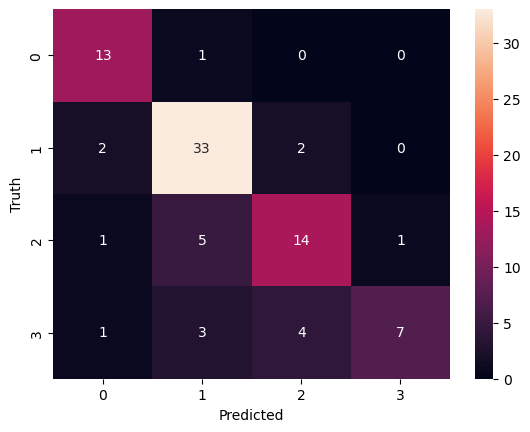

In [222]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
cm=confusion_matrix(y_test, y_pred_svm) 
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test, y_pred_svm))

In [123]:
#copied whole from chatgpt for using SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Data (Ensure it has 'Poem' and 'Type' columns)
df = pd.read_csv("Dataset_Poems.csv")  
acc=[]
# Define features (X) and labels (y)
X = df['Poem']  # Hindi Poem Text
y = df['Type']  # Poem Type (Label)
for i in range(200):
    # Train-Test Split (80% Train, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # **TF-IDF Conversion (Fix for String to Float Issue)**
    vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to numerical form
    X_train_tfidf = vectorizer.fit_transform(X_train)  
    X_test_tfidf = vectorizer.transform(X_test)  

    # **Train SVM Model**
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_tfidf, y_train) 

    # Predict & Evaluate
    y_pred_svm = svm_model.predict(X_test_tfidf)
    # print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
    acc.append(accuracy_score(y_test, y_pred_svm))



In [125]:
print("Min:", min(acc),", Max:", max(acc))
print("Average:", sum(acc)/200)

Min: 0.5862068965517241 , Max: 0.8505747126436781
Average: 0.735632183908046


In [172]:
import random
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# ------------------  1️⃣ GLOBAL SEEDING ------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ------------------  2️⃣ LOAD DATA ------------------
df = pd.read_csv("Dataset_Poems.csv").dropna(subset=['Poem', 'Type'])

# Encode Target Variable (Convert categorical labels to numbers)
label_encoder = LabelEncoder()
df['Type_Encoded'] = label_encoder.fit_transform(df['Type'])

# Define Features (X) and Labels (y)
X = df['Poem'].astype(str)  # Convert to string if needed
y = df['Type_Encoded']  # Encoded labels

# ------------------  3️⃣ TRAIN-TEST SPLIT ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)

# ------------------  4️⃣ TF-IDF VECTORIZATION ------------------
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ------------------  5️⃣ CROSS-VALIDATION & MODEL TRAINING ------------------
svm_model = SVC(kernel='linear', random_state=SEED)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# ------------------  6️⃣ HYPERPARAMETER TUNING ------------------
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(random_state=SEED), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Print Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train Best Model on Full Training Data
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_tfidf, y_train)

# ------------------  7️⃣ FINAL EVALUATION ------------------
y_pred_svm = best_svm_model.predict(X_test_tfidf)
print("Final SVM Accuracy on Test Set:", accuracy_score(y_test, y_pred_svm))

# ------------------  8️⃣ PREDICT A NEW POEM ------------------
def predict_poem(poem_text):
    poem_tfidf = vectorizer.transform([poem_text])  # Convert input poem to TF-IDF features
    predicted_type_encoded = best_svm_model.predict(poem_tfidf)[0]  # Predict encoded category
    predicted_type = label_encoder.inverse_transform([predicted_type_encoded])[0]  # Convert back to original label
    return predicted_type

# Example Prediction
new_poem = "तेरा मेरा साथ रहे जीवन भर, यह ही बस एक आस रहे।"
predicted_category = predict_poem(new_poem)
print("Predicted Poem Type:", predicted_category)


Cross-Validation Accuracy Scores: [0.8        0.71428571 0.85714286 0.82857143 0.82857143 0.71428571
 0.71428571 0.57142857 0.67647059 0.67647059]
Mean CV Accuracy: 0.7381512605042018
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Final SVM Accuracy on Test Set: 0.7701149425287356
Predicted Poem Type: Doha


In [223]:
train_acc_svm = accuracy_score(y_train, svm_model.predict(X_train_tfidf))
test_acc_svm = accuracy_score(y_test, svm_model.predict(X_test_tfidf))
print(f"SVM Train Accuracy: {train_acc_svm:.4f}")
print(f"SVM Test Accuracy: {test_acc_svm:.4f}")


SVM Train Accuracy: 1.0000
SVM Test Accuracy: 0.7701


In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# **SVM Performance Metrics**
y_train_pred_svm = svm_model.predict(X_train_tfidf)
y_test_pred_svm = svm_model.predict(X_test_tfidf)

svm_train_acc = accuracy_score(y_train, y_train_pred_svm)
svm_test_acc = accuracy_score(y_test, y_test_pred_svm)

svm_precision = precision_score(y_test, y_test_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_test_pred_svm, average='weighted')

print(f"SVM Train Accuracy: {svm_train_acc:.4f}")
print(f"SVM Test Accuracy: {svm_test_acc:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall: {svm_recall:.4f}")


SVM Train Accuracy: 1.0000
SVM Test Accuracy: 0.7701
SVM Precision: 0.7770
SVM Recall: 0.7701


## Random Forest

In [228]:
rf_model=RandomForestClassifier(n_estimators=50, random_state=SEED, max_depth=None, min_samples_split=2)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [230]:
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7931034482758621


In [234]:
test_poem="""उनके दीदार के लिए दिल तड़पता है, 
उनके इंतजार में दिल तरसता है,

क्या कहें इस कम्बख्त दिल को.. 

अपना हो कर किसी और के लिंए धड़कता है।"""

print("The given poem is of \""+predict_poem(test_poem, rf_model)+"\" type")

The given poem is of "Sher/Shayari" type


              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.77      1.00      0.87        37
           2       0.92      0.52      0.67        21
           3       0.78      0.47      0.58        15

    accuracy                           0.79        87
   macro avg       0.81      0.75      0.75        87
weighted avg       0.81      0.79      0.77        87



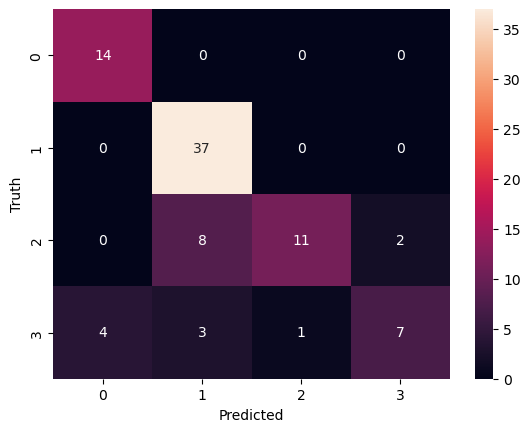

In [235]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
cm=confusion_matrix(y_test, y_pred_rf) 
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test, y_pred_rf))

## Logistic Classifier

In [236]:
lr_model=LogisticRegression(max_iter=1000, random_state=SEED, C=10, solver='lbfgs')
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [237]:
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate Accuracy
print("Logistic Classifier Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Classifier Accuracy: 0.8045977011494253


In [238]:
test_poem="""उनके दीदार के लिए दिल तड़पता है, 
उनके इंतजार में दिल तरसता है,

क्या कहें इस कम्बख्त दिल को.. 

अपना हो कर किसी और के लिंए धड़कता है।"""

print("The given poem is of \""+predict_poem(test_poem, lr_model)+"\" type")

The given poem is of "Sher/Shayari" type


              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.83      0.92      0.87        37
           2       0.68      0.71      0.70        21
           3       0.88      0.47      0.61        15

    accuracy                           0.80        87
   macro avg       0.82      0.77      0.78        87
weighted avg       0.81      0.80      0.79        87



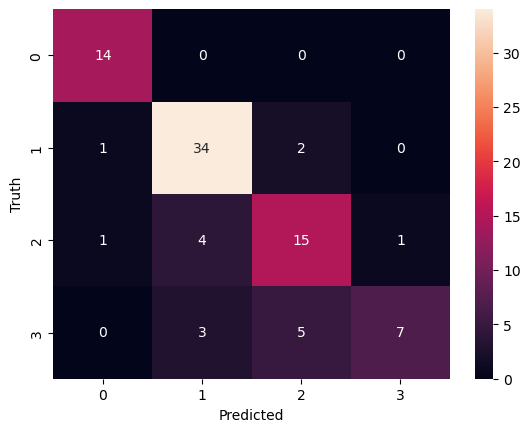

In [239]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
cm=confusion_matrix(y_test, y_pred_lr) 
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test, y_pred_lr))

🔹 Tuning SVM...
   Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
   Cross-Validation Accuracy: 0.7240
   Test Set Accuracy: 0.7701

🔹 Tuning Logistic Regression...
   Best Hyperparameters: {'C': 10, 'solver': 'lbfgs'}
   Cross-Validation Accuracy: 0.7096
   Test Set Accuracy: 0.8046

🔹 Tuning Random Forest...
   Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
   Cross-Validation Accuracy: 0.7528
   Test Set Accuracy: 0.7931

🔹 Tuning Naive Bayes...
   Best Hyperparameters: {'alpha': 0.1}
   Cross-Validation Accuracy: 0.6638
   Test Set Accuracy: 0.6667